In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 3. Lakukan input data image tersebut dan outputkan 9 gambar terakhir dalam dataset beserta dengan label kelas nya!

In [ ]:
#ANN untuk klasifikasi Gambar
#baca dataset gambar dari file path lokal
import os
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

#lokal path
dataset_pistachio = pathlib.Path("/content/drive/MyDrive/dataset/input/pistachio-image-dataset/Pistachio_Image_Dataset")

dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_pistachio)



Found 2148 files belonging to 2 classes.


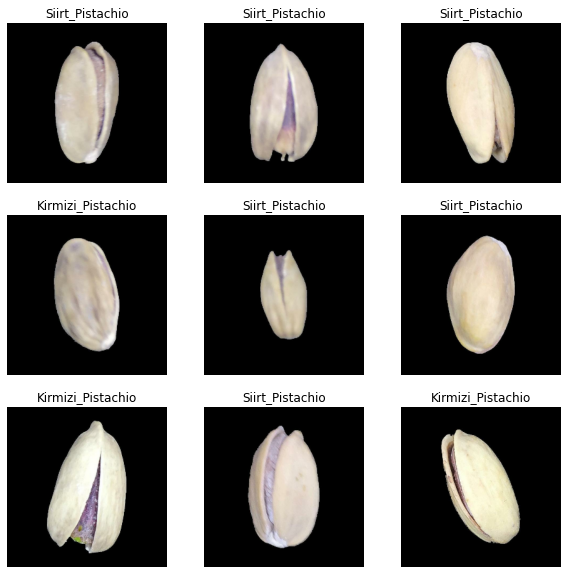

In [ ]:
import matplotlib.pyplot as plt
class_names_0 = dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #menampilkan gambar 9 terakhir
    plt.imshow(images[-i - 1].numpy().astype("uint8"))
    plt.title(class_names_0[labels[i]])
    plt.axis("off")

#### 4. Lakukan data splitting dataset tersebut sehingga dataset terbagi menjadi data training dan data validation dengan rasio 70:30!

In [ ]:
# original image shape is (600, 600, 3)

data_dir = '/content/drive/MyDrive/dataset/input/pistachio-image-dataset/Pistachio_Image_Dataset'



In [ ]:
batch_size = 32
img_height = 600
img_width = 600

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2148 files belonging to 2 classes.
Using 1504 files for training.
Found 2148 files belonging to 2 classes.
Using 644 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Kirmizi_Pistachio', 'Siirt_Pistachio']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 600, 600, 3)
(32,)


#### 5, Buatlah sebuah fungsi untuk membuat model DNN tersebut menggunakan library tensorflow dan keras dengan rincian parameter sebagai berikut

## Creating the Model Using the Sequential API

In [ ]:

model = tf.keras.Sequential()
rescalling2_layer = keras.layers.Rescaling(1./255, input_shape=[600, 600, 3])
model.add(keras.layers.Rescaling(1./255, input_shape=[600, 600, 3]))
model.add(keras.layers.Flatten(input_shape=[1000, 1000]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 600, 600, 3)       0         
                                                                 
 flatten (Flatten)           (None, 1080000)           0         
                                                                 
 dense (Dense)               (None, 128)               138240128 
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 138,250,497
Trainable params: 138,250,497


In [ ]:
#buat decorator untuk menghitung waktu eksekusi
from tensorflow.keras.callbacks import EarlyStopping, History
# 7.Buatlah sebuah decorator untuk menambahkan perhitungan waktu runtime dari fungsi training 
import time
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print(' %r  %2.2f sec' % \
              (method.__name__, te-ts))
        return result
    return timed

@timeit
# 6. Buatlah sebuah fungsi untuk melakukan proses training pada data training 
def run_model(model):
    model.fit(train_ds, epochs=5, validation_data=val_ds, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
    return model

#jalankan model
model1=run_model(model)
model1




Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.2059 - accuracy: 0.9109 - val_loss: 0.4860 - val_accuracy: 0.8602
Epoch 2/5
47/47 [==============================] - 13s 258ms/step - loss: 0.1913 - accuracy: 0.9156 - val_loss: 0.5890 - val_accuracy: 0.8447
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.1630 - accuracy: 0.9368 - val_loss: 0.5909 - val_accuracy: 0.8276
Epoch 4/5
47/47 [==============================] - 13s 263ms/step - loss: 0.2955 - accuracy: 0.8763 - val_loss: 0.7739 - val_accuracy: 0.8370
 'run_model'  66.97 sec


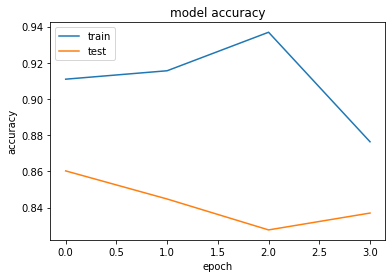

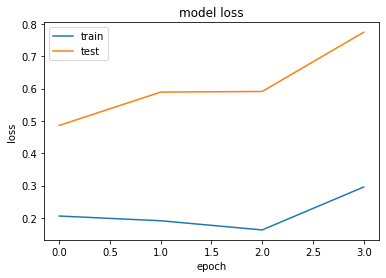

In [ ]:
#plot akurasi dan loss
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

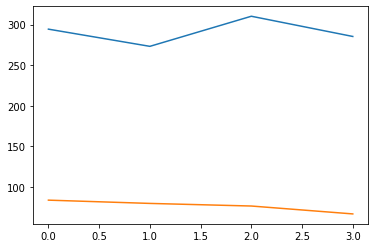

In [ ]:
cpu=[294.29,273.14,310.17,285.29 ]
gpu=[83.91,79.89,76.68, 66.97]
#buat line plot keduanya
plt.plot(cpu, label='cpu')
plt.plot(gpu, label='gpu')

<function matplotlib.pyplot.show(*args, **kw)>

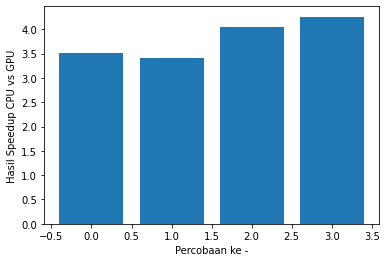

In [ ]:
speedup = []

for i in range(len(cpu)):
  speedup.append(cpu[i]/gpu[i])

plt.bar(range(len(speedup)), speedup)
plt.xlabel("Percobaan ke -")
plt.ylabel("Hasil Speedup CPU vs GPU")
plt.show

In [ ]:
!pip install nvidia-ml-py3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=0b9dc2eee2a5c222d7d07a11bdbcbad5bb43a6b0c1791dcd582331118752b89f
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
Successfully built nvidia-ml-py3


In [ ]:
import pynvml

pynvml.nvmlInit()
device_count = pynvml.nvmlDeviceGetCount()

print("Jumlah GPU:", device_count)

Jumlah GPU: 1


**Jawaban no 8**

Setiap model dilakukan 4x percobaan menggunakan runtime cpu dan gpu. Speedup perbandingan keduanya dihitung menggunakan rumus :   

S : t_cpu/t_gpu

Hasil analisis perbandingan speedup dari keduanya adalah terlihat bahwa ternyata dengan menggunakan gpu memiliki speedup 3 - 4 kali lebih cepat dibanding menggunakan cpu pada permasalahan kali ini.

Tentu pada colab free ini hanya memiliki 1 gpu, untuk mendapatkan hasil yang lebih mungkin ketika jumlah gpu lebih banyak  dengan pembagian serta modelling yang tepat akan mendapatkan speedup yang jauh lebih baik lagi.
